In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import cv2

%load_ext autoreload
%autoreload 2

In [2]:
feature_map_shapes = [38, 19, 10, 5, 3, 1]
number_of_feature_maps = 6
aspect_ratios = [1, 2, 3, 0.5, 0.333]

In [3]:
image_height = 300
image_width = 300

image = np.zeros((image_height, image_width))

In [4]:
image.shape

(300, 300)

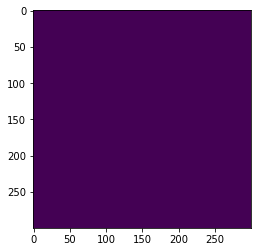

In [5]:
plt.imshow(image)

In [ ]:
s_min = 30
s_max = 315

for k in range(1, 7):
    s_k = s_min + (s_max - s_min) * (k - 1) / 5
    print(s_k)

In [ ]:
def calculate_scale_of_default_boxes(k, m = 6, s_max = 0.9, s_min = 0.2):
    """
    m = number_of_feature_maps
    s_k = s_min + (s_max - s_min) * (k - 1)/(m - 1)
    width_k = s_k * sqrt(aspect_ratio)
    height_k = s_k / sqrt(aspect_ratio)
    """
    return s_min + (s_max - s_min) * (k - 1) / (m - 1)

curent_height = feature_map_shapes[2]
current_aspect_ratios = aspect_ratios[4]

feature_map_index = 1

current_scale = calculate_scale_of_default_boxes(feature_map_index, m=number_of_feature_maps)
next_scale = calculate_scale_of_default_boxes(feature_map_index + 1, m=number_of_feature_maps)
base_prior_boxes = []
for aspect_ratio in aspect_ratios:
    height = current_scale / np.sqrt(aspect_ratio)
    width = current_scale * np.sqrt(aspect_ratio)
    base_prior_boxes.append([-height/2, -width/2, height/2, width/2])
# 1 extra pair for ratio 1
height = width = np.sqrt(current_scale * next_scale)
base_prior_boxes.append([-height/2, -width/2, height/2, width/2])

In [ ]:
w_k = []

for i in range(1, 7):
    current_scale = calculate_scale_of_default_boxes(k = i)
    w_k.append(current_scale)
    
w_k

In [ ]:
start_x = int(0.2 * image_width)
start_y = int(0.2 * image_height)

image = np.zeros((image_width, image_height))

color = (255, 0, 0)

for w in w_k:
    end_x, end_y = int(start_x + w * image_width), int(start_y + w * image_height)
    
    image = cv2.rectangle(image, [start_x, start_y], [end_x, end_y], color, thickness = 1)

plt.figure(figsize = (20,20))
plt.imshow(image)

In [ ]:
300 // 38

In [ ]:
image = np.zeros((image_width, image_height))

color = (255, 0, 0)

prior_boxes = 30

count = 0
for i in range(1):
    for j in range(29, 30):
        stride = 10
        start_x = j * stride
        start_y = i * stride
        end_x = prior_boxes + j * stride
        end_y = prior_boxes + i * stride
        
#         print(start_x, start_y, end_x, end_y)
        
        count+=1

        image = cv2.rectangle(image, [start_x, start_y], [end_x, end_y], color, thickness = 1)


plt.figure(figsize = (20,20))
plt.imshow(image)

In [6]:
from itertools import product as product

In [ ]:
steps = [8, 16, 30, 60, 100, 300]
steps = [8, 16, 32, 64, 100, 300]
min_sizes = [30, 60, 111, 162, 213, 264]
max_sizes = [60, 111, 162, 213, 264, 315]
aspect_ratios = [[2], [2, 3], [2, 3], [2, 3], [2], [2]]

In [ ]:
mean = []


for k, f in enumerate(feature_map_shapes):
    if k == 0:
        for i, j in product(range(f), repeat=2):
#             f_k = image_height / steps[k]
            f_k = f

            cx = (j + 0.5) / f_k
            cy = (i + 0.5) / f_k
    #         s_k = min_sizes[k]/image_height
            s_k = calculate_scale_of_default_boxes(k, m = 6)
            mean += [cx, cy, s_k, s_k]

            # aspect_ratio: 1
            # rel size: sqrt(s_k * s_(k+1))
            s_k_prime = np.sqrt(s_k * calculate_scale_of_default_boxes(k + 1, m = 6))
    #         s_k_prime = np.sqrt(s_k * (max_sizes[k]/image_height))
    #         mean += [cx, cy, s_k_prime, s_k_prime]

            # rest of aspect ratios
    #         for ar in aspect_ratios[k]:
    #             mean += [cx, cy, s_k*np.sqrt(ar), s_k/np.sqrt(ar)]
    #             mean += [cx, cy, s_k/np.sqrt(ar), s_k*np.sqrt(ar)]


In [ ]:
prior_boxes = np.array(mean).reshape(-1, 4)

In [ ]:
prior_boxes.shape

In [62]:
def yoloFormattocv(x1, y1, x2, y2, H, W):
    bbox_width = x2 * W
    bbox_height = y2 * H
    center_x = x1 * W
    center_y = y1 * H

    voc = []

    voc.append(center_x - (bbox_width / 2))
    voc.append(center_y - (bbox_height / 2))
    voc.append(center_x + (bbox_width / 2))
    voc.append(center_y + (bbox_height / 2))

    return [int(v) for v in voc]

In [ ]:
prior_boxes

yoloFormattocv(start_x, start_y, end_x, end_y, 300, 300)

In [ ]:
start_x, start_y, end_x, end_y 

In [ ]:
yoloFormattocv(0.5       , 0.5       , 0.82704293, 0.82704293, 300, 300)

In [ ]:
0.01315789 * 300

In [ ]:
prior_boxes * 300

In [ ]:
color = (255, 0, 255)
image = np.zeros((image_width, image_height))
i = 0
for pr in prior_boxes:
    if i % 50 == 0:

        start_x, start_y, end_x, end_y = pr

        start_x, start_y, end_x, end_y = yoloFormattocv(start_x, start_y, end_x, end_y, 300, 300)

    #     start_x, start_y, end_x, end_y = int(start_x * image_width), int(start_y * image_height), int(end_x * image_width), int(end_y * image_height)
    #     print(start_x, start_y, end_x, end_y )
        image = cv2.rectangle(image, [start_x, start_y], [end_x, end_y], color, thickness = 1)
    i += 1

plt.figure(figsize = (20,20))
plt.imshow(image)

In [ ]:
for k, f in enumerate(feature_map_shapes):
    f_k = feature_map_shapes[k]
    s_k = calculate_scale_of_default_boxes(k, m = 6)
    print('f_k: ', f_k)
    for i, j in product(range(f), repeat=2):
        
        cx = (i + 0.5) / f_k
        cy = (j + 0.5) / f_k
        print(cx, cy, cx * 300, cy * 300, s_k * 300)

In [ ]:
228 / 2

In [ ]:
prior_boxes = prior_boxes.tolist()

In [ ]:
tf.convert_to_tensor(prior_boxes, dtype=tf.float32)

In [7]:
import sys
 
# setting path
sys.path.append('../')

In [8]:
from bbox_utils import *

In [9]:
feature_map_shapes = [38, 19, 10, 5, 3, 1]
aspect_ratios = [
    [1, 2, 0.5],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 3, 0.5, 0.333],
    [1, 2, 0.5],
    [1, 2, 0.5]
]
number_of_feature_maps = 6

In [10]:
prior_boxes = generate_default_boxes(feature_map_shapes, number_of_feature_maps, aspect_ratios)

2022-08-25 06:03:36.980561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
prior_box_cx, prior_box_cy, prior_box_width, prior_box_height = tf.split(prior_boxes, num_or_size_splits = 4, axis = 1)

In [12]:
prior_boxes * 300

<tf.Tensor: shape=(8732, 4), dtype=float32, numpy=
array([[  3.9473684,   3.9473684,  32.863354 ,  32.863354 ],
       [  3.9473684,   3.9473684,  18.       ,  18.       ],
       [  3.9473684,   3.9473684,  25.455845 ,  12.727922 ],
       ...,
       [150.       , 150.       , 228.       , 228.       ],
       [150.       , 150.       , 300.       , 161.22034  ],
       [150.       , 150.       , 161.22034  , 300.       ]],
      dtype=float32)>

In [45]:
gt_boxes = tf.constant([
    [0., 0., 0.2, 0.2],
    [0.8, 0.8, 1.0, 0.9]
])

In [46]:
gt_boxes

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0. , 0. , 0.2, 0.2],
       [0.8, 0.8, 1. , 0.9]], dtype=float32)>

In [47]:
boxes = convert_to_box_form(prior_boxes)

In [48]:
box_x_min, box_y_min, box_x_max, box_x_max = tf.split(boxes, 4, axis = 1)
gt_boxes_x_min, gt_boxes_y_min, gt_boxes_x_max, gt_boxes_x_max = tf.split(gt_boxes, 4, axis = 1)

In [177]:
boxes = tf.constant([
    [60, 80, 120, 140],
    [100, 110, 200, 180]
])

gt_boxes = tf.constant([
    [0, 0, 20, 20],
    [50, 90, 110, 150]
])

In [183]:
box_x_min, box_y_min, box_x_max, box_y_max = tf.split(boxes, 4, axis = 1)
gt_boxes_x_min, gt_boxes_y_min, gt_boxes_x_max, gt_boxes_y_max = tf.split(gt_boxes, 4, axis = 1)

intersection_x_min = tf.maximum(box_x_min, tf.transpose(gt_boxes_x_min))
intersection_y_min = tf.maximum(box_y_min, tf.transpose(gt_boxes_y_min))

intersection_x_max = tf.minimum(box_x_max, tf.transpose(gt_boxes_x_max))
intersection_y_max = tf.minimum(box_y_max, tf.transpose(gt_boxes_y_max))

intersection_area = tf.maximum(intersection_x_max - intersection_x_min, 0) * tf.maximum(intersection_y_max - intersection_y_min, 0)

boxes_areas = (box_x_max - box_x_min) * (box_y_max - box_y_min)
gt_box_areas = (gt_boxes_x_max - gt_boxes_x_min) * (gt_boxes_y_max - gt_boxes_y_min)

union = (boxes_areas + tf.transpose(gt_box_areas)) - intersection_area
union = intersection_area / union


# union = tf.maximum(intersection_area / union, 0)

In [184]:
union

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.        , 0.53191489],
       [0.        , 0.03921569]])>

In [185]:
union[1, :].numpy()

array([0.        , 0.03921569])

In [186]:
tf.math.argmax(union, axis = 0)

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 0])>

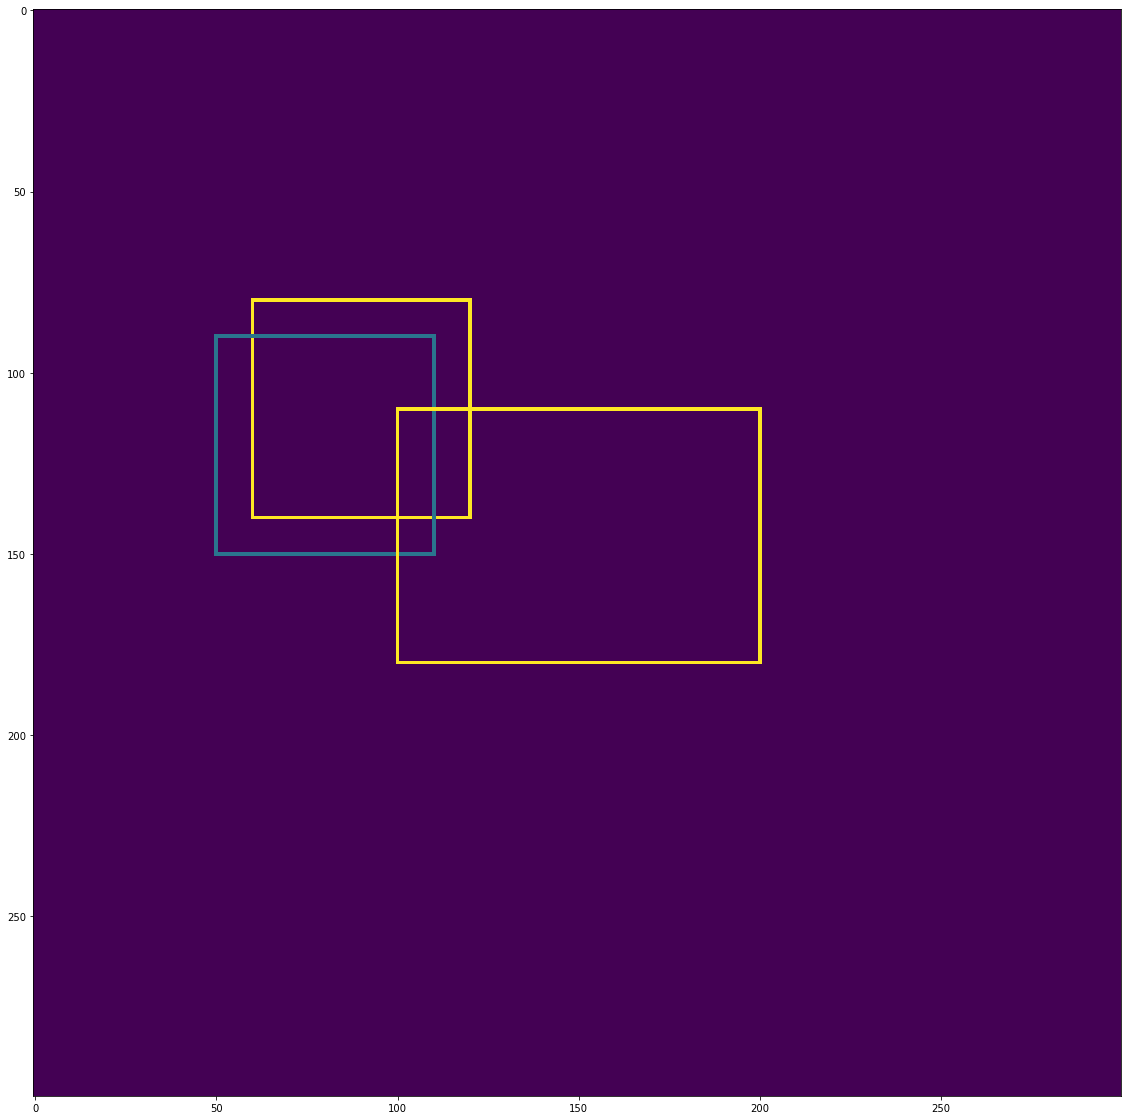

In [163]:
image = np.ones((image_width, image_height))

image = cv2.rectangle(image, [60, 80], [120, 140], color, thickness = 1)

image = cv2.rectangle(image, [50, 90], [110, 150], (100, 100, 1), thickness = 1)

image = cv2.rectangle(image, [100, 110], [200, 180], color, thickness = 1)

plt.figure(figsize = (20,20))
plt.imshow(image)

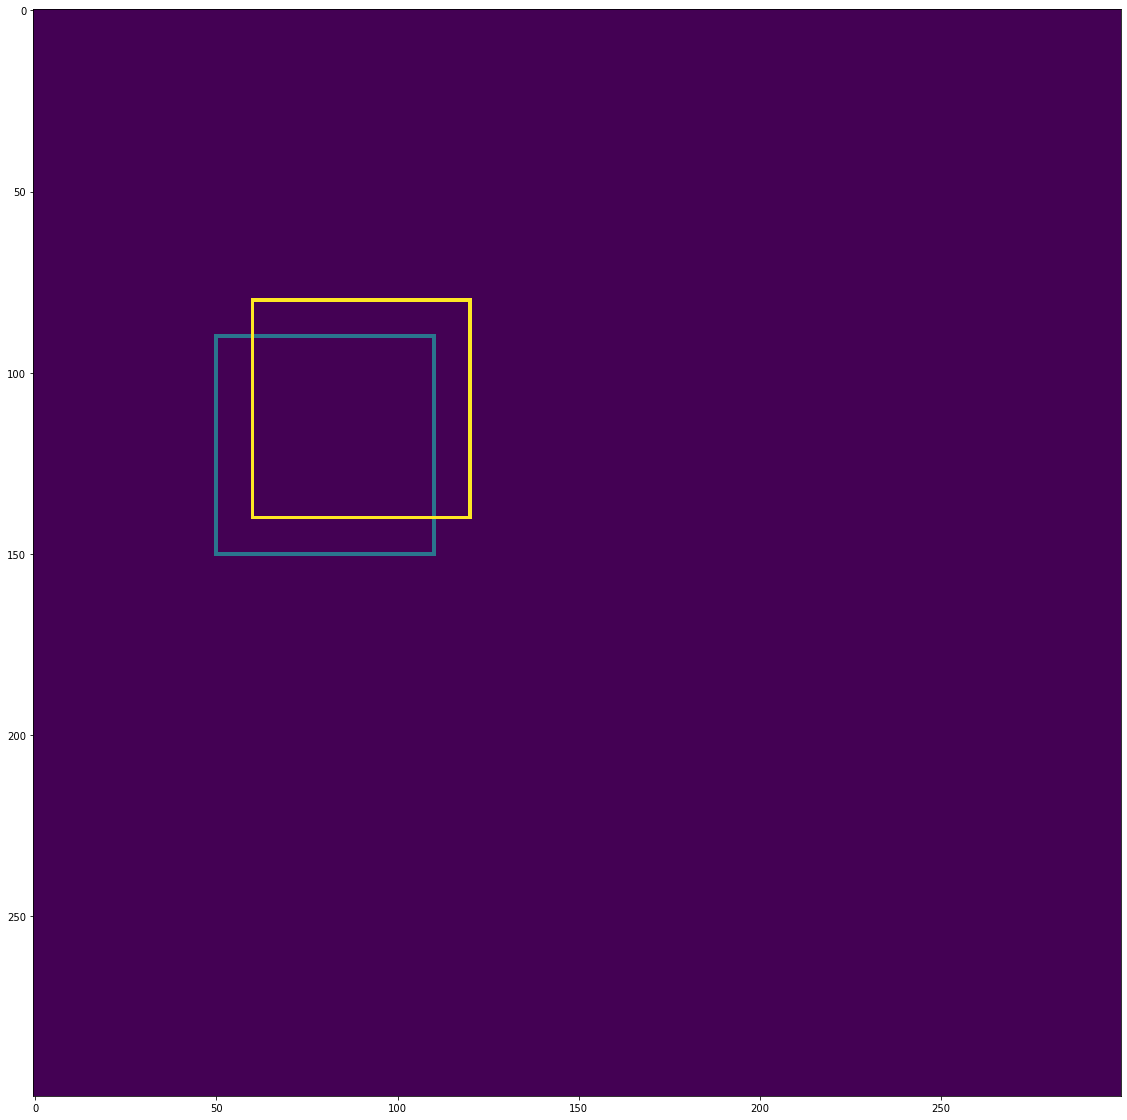

In [173]:
gt_color = (100, 100, 0)
color = (255, 0, 0)

image = np.ones((image_width, image_height))

# draw gt_boxes
for gt in gt_boxes:
    start_x, start_y, end_x, end_y = gt.numpy()

#     start_x, start_y, end_x, end_y = int(start_x * image_width), int(start_y * image_height), int(end_x * image_width), int(end_y * image_height)
#     print(start_x, start_y, end_x, end_y )
    image = cv2.rectangle(image, [start_x, start_y], [end_x, end_y], gt_color, thickness = 1)
    
for m in tf.math.argmax(union, axis = 0):
    start_x, start_y, end_x, end_y = boxes[m, :].numpy()
    
#     start_x, start_y, end_x, end_y = yoloFormattocv(start_x, start_y, end_x, end_y, image_width, image_height)
    
    image = cv2.rectangle(image, [start_x, start_y], [end_x, end_y], color, thickness = 1)
    
plt.figure(figsize = (20,20))
plt.imshow(image)

In [167]:
start_x, start_y, end_x, end_y

(0.013157895, 0.013157895, 0.10954451, 0.10954451)